In [47]:
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import copy

In [48]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?', header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [49]:
data.isnull().sum().sum()

0

 -  As the number of NAN is zero there is no missing data

In [50]:
encode_cut = pd.get_dummies(data["cut"],prefix='cut')
encode_color = pd.get_dummies(data["color"],prefix='color')
encode_clarity = pd.get_dummies(data["clarity"],prefix='clarity')

In [51]:
dataAfterEncode = pd.concat([data,encode_cut,encode_color,encode_clarity],axis=1)
dataAfterEncode= dataAfterEncode.drop(['cut','clarity','color'],axis=1)
dataAfterEncode['carat'] = pd.to_numeric(dataAfterEncode['carat'])
dataAfterEncode['depth'] = pd.to_numeric(dataAfterEncode['depth'])
dataAfterEncode['table'] = pd.to_numeric(dataAfterEncode['table'])
dataAfterEncode['price'] = pd.to_numeric(dataAfterEncode['price'])
dataAfterEncode['x'] = pd.to_numeric(dataAfterEncode['x'])
dataAfterEncode['y'] = pd.to_numeric(dataAfterEncode['y'])
dataAfterEncode['z'] = pd.to_numeric(dataAfterEncode['z'])

 - Now the data is converted to all numbers need to split into training,validation and test

In [52]:
x = dataAfterEncode.drop('price',axis=1)
y = dataAfterEncode['price']

1. b) Do we need to normalise data? [If so Does it make any difference?].
 -  we measure the distances between pairs of samples and these distances are influenced by the measurement units also 
 - Hence the data should be normalized because we are calculating distances

In [53]:
colsToNorm = ['carat','depth','table','x','y','z']
for s in colsToNorm:
    x[s]=(x[s]-x[s].min())/(x[s].max()-x[s].min()) # normalizing the parameters

In [54]:
x_train, x_test_val, y_train, y_test_val = train_test_split(x,y,test_size=0.02,train_size=0.98)
x_val, x_test, y_val, y_test = train_test_split(x_test_val,y_test_val,test_size=0.5,train_size=0.5)
print("original : ",x.shape)
print("training : ",x_train.shape)
print("validation :",x_val.shape)
print("test :",x_test.shape)

original :  (53940, 26)
training :  (52861, 26)
validation : (539, 26)
test : (540, 26)


 -  Data is divided now need to apply knn

In [55]:
def getManhattan(list1,list2):
    error = 0
    for i in range(len(list1)):
        error = error + abs(list1[i]-list2[i])
    return error

In [56]:
def getPriceMan(k,x_train,y_train,currInstance):
    dist = [] # contains tuple (dist,y value)
    for i in range(x_train.shape[0]):
        currDist = getManhattan(currInstance,x_train.iloc[i].values)
        dist.append((currDist,y_train.iloc[i]))
    dist.sort()
    #return avg of top k values
    ans = 0
    for i in range(k):
        ans = ans + dist[i][1]
    return ans/k

In [57]:
def getDistanceEucli(list1,list2):
    errorSqr = 0
    for i in range(len(list1)):
        errorSqr = errorSqr + pow(list1[i]-list2[i],2)
    return pow(errorSqr,0.5)

In [58]:
def getPriceEucli(k,x_train,y_train,currInstance):
    dist = [] # contains tuple (dist,y value)
    for i in range(x_train.shape[0]):
        currDist = getDistanceEucli(currInstance,x_train.iloc[i].values)
        dist.append((currDist,y_train.iloc[i]))
    dist.sort()
    #return avg of top k values
    ans = 0
    for i in range(k):
        ans = ans + dist[i][1]
    return ans/k
    #sort dist here 

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.
 - Currently experimenting with k=5 for selecting the distance measure.
 - As all the above data is processed with one hot encoding there is not categorical data left for hamming distance

In [18]:
k = 5 # fixing value of k for now
n,m = x_val.shape

data = []
for i in range(n):
    print("current row is : ", i)
    row = x_val.iloc[i].values
    #print(row)
    p_eucli = getPriceEucli(k,x_train,y_train,row)
    #p_man = getPriceMan(k,x_train,y_train,row)
    print("prdeicted eucli: ",p_eucli," prdeicted man: ",p_man, " actual price : ",y_val.iloc[i])
    data.append([p_eucli,p_man,y_val.iloc[i]])
predictions = pd.DataFrame(data, columns = ['Predic_euclid', 'predict_man','Actual_price'])
predictions.head()

current row is :  0
prdeicted eucli:  953.8  prdeicted man:  953.8  actual price :  875
current row is :  1
prdeicted eucli:  812.4  prdeicted man:  769.6  actual price :  658
current row is :  2
prdeicted eucli:  1936.2  prdeicted man:  1939.2  actual price :  1993
current row is :  3
prdeicted eucli:  13506.4  prdeicted man:  13506.4  actual price :  12832
current row is :  4
prdeicted eucli:  4221.0  prdeicted man:  4221.0  actual price :  5062
current row is :  5
prdeicted eucli:  2026.2  prdeicted man:  2005.6  actual price :  2215
current row is :  6
prdeicted eucli:  2655.0  prdeicted man:  2732.6  actual price :  2802
current row is :  7
prdeicted eucli:  1382.6  prdeicted man:  1382.6  actual price :  1318
current row is :  8
prdeicted eucli:  3129.6  prdeicted man:  2931.4  actual price :  2607
current row is :  9
prdeicted eucli:  11753.8  prdeicted man:  12742.6  actual price :  11923
current row is :  10
prdeicted eucli:  1434.0  prdeicted man:  1182.2  actual price :  125

prdeicted eucli:  613.2  prdeicted man:  613.2  actual price :  614
current row is :  91
prdeicted eucli:  664.6  prdeicted man:  642.6  actual price :  598
current row is :  92
prdeicted eucli:  926.4  prdeicted man:  926.4  actual price :  842
current row is :  93
prdeicted eucli:  15179.8  prdeicted man:  15179.8  actual price :  15451
current row is :  94
prdeicted eucli:  1972.0  prdeicted man:  1930.8  actual price :  1883
current row is :  95
prdeicted eucli:  7007.2  prdeicted man:  7007.2  actual price :  7745
current row is :  96
prdeicted eucli:  6042.6  prdeicted man:  6255.2  actual price :  6271
current row is :  97
prdeicted eucli:  1165.2  prdeicted man:  1347.4  actual price :  1690
current row is :  98
prdeicted eucli:  2145.6  prdeicted man:  2145.6  actual price :  2298
current row is :  99
prdeicted eucli:  13224.8  prdeicted man:  13137.2  actual price :  14544
current row is :  100
prdeicted eucli:  716.8  prdeicted man:  716.8  actual price :  731
current row is

prdeicted eucli:  915.0  prdeicted man:  1167.4  actual price :  867
current row is :  180
prdeicted eucli:  743.2  prdeicted man:  764.6  actual price :  738
current row is :  181
prdeicted eucli:  9891.2  prdeicted man:  9891.2  actual price :  9122
current row is :  182
prdeicted eucli:  1900.8  prdeicted man:  1900.8  actual price :  1909
current row is :  183
prdeicted eucli:  623.8  prdeicted man:  623.8  actual price :  720
current row is :  184
prdeicted eucli:  5260.8  prdeicted man:  5260.8  actual price :  5207
current row is :  185
prdeicted eucli:  10206.6  prdeicted man:  10206.6  actual price :  10656
current row is :  186
prdeicted eucli:  753.8  prdeicted man:  846.0  actual price :  723
current row is :  187
prdeicted eucli:  1179.8  prdeicted man:  1145.2  actual price :  1406
current row is :  188
prdeicted eucli:  711.4  prdeicted man:  721.4  actual price :  700
current row is :  189
prdeicted eucli:  1750.6  prdeicted man:  1712.0  actual price :  1596
current ro

prdeicted eucli:  3282.6  prdeicted man:  3835.2  actual price :  3837
current row is :  269
prdeicted eucli:  513.8  prdeicted man:  532.2  actual price :  548
current row is :  270
prdeicted eucli:  4310.2  prdeicted man:  4234.6  actual price :  4677
current row is :  271
prdeicted eucli:  8216.2  prdeicted man:  8216.2  actual price :  7535
current row is :  272
prdeicted eucli:  506.0  prdeicted man:  512.8  actual price :  421
current row is :  273
prdeicted eucli:  1058.6  prdeicted man:  1058.6  actual price :  1007
current row is :  274
prdeicted eucli:  691.0  prdeicted man:  669.0  actual price :  644
current row is :  275
prdeicted eucli:  656.6  prdeicted man:  656.6  actual price :  817
current row is :  276
prdeicted eucli:  3724.6  prdeicted man:  3724.6  actual price :  3643
current row is :  277
prdeicted eucli:  926.4  prdeicted man:  951.4  actual price :  1109
current row is :  278
prdeicted eucli:  1779.8  prdeicted man:  1773.0  actual price :  1588
current row i

prdeicted eucli:  15032.6  prdeicted man:  14723.8  actual price :  14625
current row is :  358
prdeicted eucli:  2144.8  prdeicted man:  2064.0  actual price :  2168
current row is :  359
prdeicted eucli:  1494.0  prdeicted man:  1521.2  actual price :  1415
current row is :  360
prdeicted eucli:  388.4  prdeicted man:  388.4  actual price :  364
current row is :  361
prdeicted eucli:  3233.6  prdeicted man:  3321.6  actual price :  3613
current row is :  362
prdeicted eucli:  1106.4  prdeicted man:  1090.4  actual price :  1063
current row is :  363
prdeicted eucli:  2316.6  prdeicted man:  2507.4  actual price :  2762
current row is :  364
prdeicted eucli:  593.0  prdeicted man:  548.2  actual price :  612
current row is :  365
prdeicted eucli:  10859.0  prdeicted man:  10859.0  actual price :  12052
current row is :  366
prdeicted eucli:  480.2  prdeicted man:  480.2  actual price :  435
current row is :  367
prdeicted eucli:  4678.6  prdeicted man:  4575.0  actual price :  4744
cu

prdeicted eucli:  2663.4  prdeicted man:  2553.4  actual price :  2239
current row is :  447
prdeicted eucli:  695.0  prdeicted man:  695.0  actual price :  616
current row is :  448
prdeicted eucli:  2959.2  prdeicted man:  2959.2  actual price :  2986
current row is :  449
prdeicted eucli:  2409.0  prdeicted man:  2409.0  actual price :  2287
current row is :  450
prdeicted eucli:  652.0  prdeicted man:  683.4  actual price :  673
current row is :  451
prdeicted eucli:  526.0  prdeicted man:  526.0  actual price :  456
current row is :  452
prdeicted eucli:  5815.6  prdeicted man:  5542.4  actual price :  5405
current row is :  453
prdeicted eucli:  2264.0  prdeicted man:  2264.0  actual price :  2348
current row is :  454
prdeicted eucli:  731.6  prdeicted man:  731.6  actual price :  776
current row is :  455
prdeicted eucli:  630.8  prdeicted man:  630.8  actual price :  571
current row is :  456
prdeicted eucli:  2082.8  prdeicted man:  2069.4  actual price :  2001
current row is

prdeicted eucli:  1167.2  prdeicted man:  1167.2  actual price :  1119
current row is :  536
prdeicted eucli:  739.6  prdeicted man:  739.6  actual price :  906
current row is :  537
prdeicted eucli:  1760.0  prdeicted man:  1937.0  actual price :  1775
current row is :  538
prdeicted eucli:  759.6  prdeicted man:  697.2  actual price :  886


,Predic_euclid,predict_man,Actual_price
0,953.8,953.8,875
1,812.4,769.6,658
2,1936.2,1939.2,1993
3,13506.4,13506.4,12832
4,4221.0,4221.0,5062


### Plot the figures here first using matplotlib

In [90]:
predictions['index_col'] = predictions.index

<IPython.core.display.Javascript object>


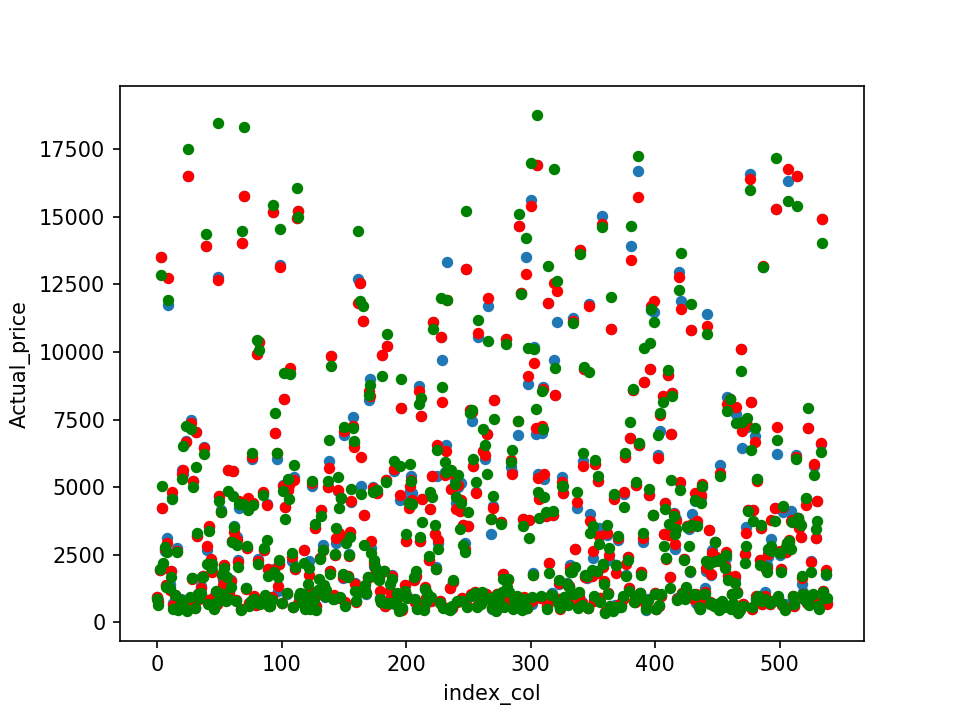

In [94]:
ax = plt.gca()
x_axis = list(predictions.index)
predictions.plot(kind='scatter',x='index_col',y='Predic_euclid',ax=ax,use_index=False)
predictions.plot(kind='scatter',x='index_col',y='predict_man', color='red', ax=ax,use_index=False)
predictions.plot(kind='scatter',x='index_col',y='Actual_price', color='green', ax=ax,use_index=False)

In [21]:
def meanAbsoluteError(list1,list2):
    n = len(list1)
    err = 0
    for i in range(n):
        err = err + abs(list1[i]-list2[i])
    return err/n

In [137]:
def meanSquaredError(list1,list2):
    n = len(list1)
    err = 0
    for i in range(n):
        err = err + pow(list1[i]-list2[i],2)
    return err/n

In [138]:
MSE_euclid = meanSquaredError(predictions['Predic_euclid'],predictions['Actual_price'])
MAE_euclid = meanAbsoluteError(predictions['Predic_euclid'],predictions['Actual_price'])
r2_euclid = r2_score(predictions['Actual_price'],predictions['Predic_euclid'])
MSE_man = meanSquaredError(predictions['predict_man'],predictions['Actual_price'])
MAE_man = meanAbsoluteError(predictions['predict_man'],predictions['Actual_price'])
r2_man = r2_score(predictions['Actual_price'],predictions['predict_man'])

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [146]:
from prettytable import PrettyTable
t = PrettyTable(['Error Type', 'Euclid distance','Manhattan distance'])
t.add_row(['MSE', MSE_euclid,MSE_man])
t.add_row(['MAE', MAE_euclid,MAE_man])
t.add_row(['r2_score',r2_euclid,r2_man])
print(t)

+------------+--------------------+--------------------+
| Error Type |  Euclid distance   | Manhattan distance |
+------------+--------------------+--------------------+
|    MSE     | 402436.0096474954  | 344012.95139146555 |
|    MAE     | 330.96252319109425 | 312.5617810760668  |
|  r2_score  | 0.9746092158194166 | 0.9782952857231707 |
+------------+--------------------+--------------------+


 - As the manhattan is giving less error compared to Euclid on Validation data. We will select Manhattan distance. 
 - Now need to find the value of k which is giving the least error with distance using manhattan

In [59]:
def getPriceForKvaluesMan(kvalues,x_train,y_train,currInstance):
    dist = [] # contains tuple (dist,y value)
    for i in range(x_train.shape[0]):
        currDist = getManhattan(currInstance,x_train.iloc[i].values)
        dist.append((currDist,y_train.iloc[i]))
    dist.sort()
    #return avg of least k distances values
    ansList = []
    for k in kvalues:
        ans = 0
        for i in range(k):
            ans = ans + dist[i][1]
        ansList.append(ans/k)
    return ansList

In [60]:
n,m = x_val.shape
kvalues = [2,3,5,7,11,16]
Kdata = []
for i in range(n):
    print("current row is : ", i)
    row = x_val.iloc[i].values
    #print(row)
    p_man = getPriceForKvaluesMan(kvalues,x_train,y_train,row)
    #print("prdeicted man: ",p_man, " actual price : ",y_val.iloc[i])
    p_man.append(y_val.iloc[i])
    Kdata.append(p_man)
columNames = [str(x) for x in kvalues]
columNames.append('Actual_price')
print('col names are : ',columNames)
Kpredictions = pd.DataFrame(Kdata, columns = columNames)

current row is :  0
current row is :  1
current row is :  2
current row is :  3
current row is :  4
current row is :  5
current row is :  6
current row is :  7
current row is :  8
current row is :  9
current row is :  10
current row is :  11
current row is :  12
current row is :  13
current row is :  14
current row is :  15
current row is :  16
current row is :  17
current row is :  18
current row is :  19
current row is :  20
current row is :  21
current row is :  22
current row is :  23
current row is :  24
current row is :  25
current row is :  26
current row is :  27
current row is :  28
current row is :  29
current row is :  30
current row is :  31
current row is :  32
current row is :  33
current row is :  34
current row is :  35
current row is :  36
current row is :  37
current row is :  38
current row is :  39
current row is :  40
current row is :  41
current row is :  42
current row is :  43
current row is :  44
current row is :  45
current row is :  46
current row is :  47
cu

current row is :  378
current row is :  379
current row is :  380
current row is :  381
current row is :  382
current row is :  383
current row is :  384
current row is :  385
current row is :  386
current row is :  387
current row is :  388
current row is :  389
current row is :  390
current row is :  391
current row is :  392
current row is :  393
current row is :  394
current row is :  395
current row is :  396
current row is :  397
current row is :  398
current row is :  399
current row is :  400
current row is :  401
current row is :  402
current row is :  403
current row is :  404
current row is :  405
current row is :  406
current row is :  407
current row is :  408
current row is :  409
current row is :  410
current row is :  411
current row is :  412
current row is :  413
current row is :  414
current row is :  415
current row is :  416
current row is :  417
current row is :  418
current row is :  419
current row is :  420
current row is :  421
current row is :  422
current ro

In [61]:
Kpredictions.head()

,2,3,5,7,11,16,Actual_price
0,8695.0,8499.666667,8540.6,8200.000000,7963.090909,8141.7500,8456
1,1361.0,1355.000000,1376.4,1370.000000,1350.090909,1346.1875,1374
2,16398.5,16346.333333,16136.8,16342.571429,16583.454545,16468.7500,18077
3,1326.5,1351.666667,1417.0,1399.714286,1414.363636,1415.8750,1415
4,906.0,924.333333,943.2,973.142857,927.000000,939.2500,1053


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

In [62]:
r2_score_list = []
for k in kvalues:
    r2_score_list.append(r2_score(Kpredictions['Actual_price'],Kpredictions[str(k)]))

In [63]:
names = [str(k) for k in kvalues]
k_r2_score_data = list(zip(names,r2_score_list))
k_r2_score_df = pd.DataFrame(k_r2_score_data, columns = ['k', 'r2_score']) 
k_r2_score_df

,k,r2_score
0,2,0.968911
1,3,0.965732
2,5,0.963058
3,7,0.955755
4,11,0.947784
5,16,0.935955


<IPython.core.display.Javascript object>


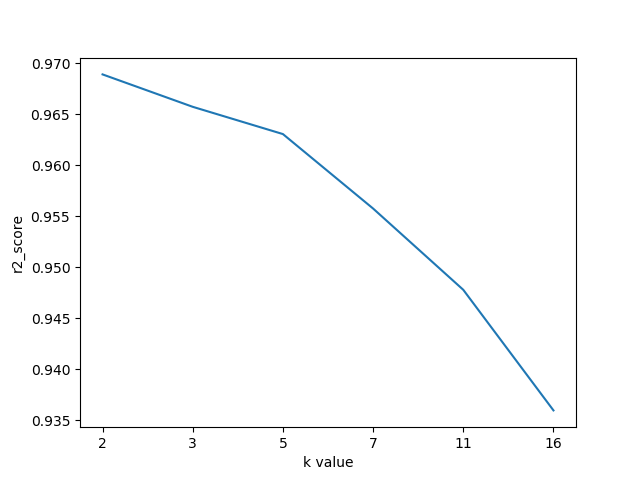

Text(0,0.5,'r2_score')

In [64]:
import matplotlib.pyplot as plt
plt.plot(k_r2_score_df['k'], k_r2_score_df['r2_score'])
plt.xlabel("k value")
plt.ylabel("r2_score")

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

 - The R-squared scores denote by what percentage the variance is decreased compared to mean value. Hence the higher the R-squared score the better the fit is. 
 - To identify the best K. From the above graph we see the R-squared is decreasing after K=3. Hence we should select K where
   R^squared score is maximun i.e 3
 - The computational procedure is to plot k vs R-square and select K where R-square is maximum
 - Hence selecting k=3 with manhattan distance to evaluate on test data

In [65]:
final_k = 3 # fixing value of k for now
n_test,m_test = x_test.shape

data_final = []
for i in range(n_test):
    print("current row is : ", i)
    row = x_test.iloc[i].values
    #print(row)
    p_man_final = getPriceMan(final_k,x_train,y_train,row)
    print("prdeicted man: ",p_man_final, " actual price : ",y_test.iloc[i])
    data_final.append([p_man_final,y_test.iloc[i]])
predictions_final = pd.DataFrame(data_final, columns = ['predict_final','Actual_price'])
predictions_final.head()

current row is :  0
prdeicted man:  2941.0  actual price :  2916
current row is :  1
prdeicted man:  1775.6666666666667  actual price :  1829
current row is :  2
prdeicted man:  11226.333333333334  actual price :  10929
current row is :  3
prdeicted man:  5843.666666666667  actual price :  5543
current row is :  4
prdeicted man:  1162.3333333333333  actual price :  1410
current row is :  5
prdeicted man:  1884.3333333333333  actual price :  2241
current row is :  6
prdeicted man:  876.0  actual price :  683
current row is :  7
prdeicted man:  1052.6666666666667  actual price :  1121
current row is :  8
prdeicted man:  3385.0  actual price :  2879
current row is :  9
prdeicted man:  1942.3333333333333  actual price :  2010
current row is :  10
prdeicted man:  6169.666666666667  actual price :  6027
current row is :  11
prdeicted man:  867.0  actual price :  854
current row is :  12
prdeicted man:  7087.333333333333  actual price :  5825
current row is :  13
prdeicted man:  538.0  actual

prdeicted man:  1897.0  actual price :  1809
current row is :  114
prdeicted man:  13111.333333333334  actual price :  14300
current row is :  115
prdeicted man:  15025.666666666666  actual price :  17673
current row is :  116
prdeicted man:  1185.3333333333333  actual price :  1243
current row is :  117
prdeicted man:  8868.333333333334  actual price :  7182
current row is :  118
prdeicted man:  5670.666666666667  actual price :  5602
current row is :  119
prdeicted man:  791.6666666666666  actual price :  967
current row is :  120
prdeicted man:  1536.6666666666667  actual price :  1574
current row is :  121
prdeicted man:  4265.666666666667  actual price :  4304
current row is :  122
prdeicted man:  936.6666666666666  actual price :  945
current row is :  123
prdeicted man:  563.3333333333334  actual price :  689
current row is :  124
prdeicted man:  6832.333333333333  actual price :  6726
current row is :  125
prdeicted man:  925.0  actual price :  895
current row is :  126
prdeict

prdeicted man:  4304.666666666667  actual price :  4794
current row is :  224
prdeicted man:  12649.0  actual price :  12823
current row is :  225
prdeicted man:  3380.6666666666665  actual price :  3301
current row is :  226
prdeicted man:  600.0  actual price :  571
current row is :  227
prdeicted man:  4239.0  actual price :  3689
current row is :  228
prdeicted man:  2736.3333333333335  actual price :  2738
current row is :  229
prdeicted man:  4962.0  actual price :  5218
current row is :  230
prdeicted man:  4386.0  actual price :  4028
current row is :  231
prdeicted man:  6111.666666666667  actual price :  6325
current row is :  232
prdeicted man:  2185.6666666666665  actual price :  2964
current row is :  233
prdeicted man:  1302.6666666666667  actual price :  1241
current row is :  234
prdeicted man:  776.3333333333334  actual price :  744
current row is :  235
prdeicted man:  4775.0  actual price :  4759
current row is :  236
prdeicted man:  862.3333333333334  actual price :

prdeicted man:  1207.6666666666667  actual price :  1010
current row is :  335
prdeicted man:  1758.0  actual price :  1664
current row is :  336
prdeicted man:  516.3333333333334  actual price :  505
current row is :  337
prdeicted man:  5962.0  actual price :  4771
current row is :  338
prdeicted man:  1612.0  actual price :  1718
current row is :  339
prdeicted man:  932.3333333333334  actual price :  737
current row is :  340
prdeicted man:  16546.0  actual price :  17379
current row is :  341
prdeicted man:  1774.6666666666667  actual price :  1929
current row is :  342
prdeicted man:  13361.0  actual price :  13120
current row is :  343
prdeicted man:  831.3333333333334  actual price :  683
current row is :  344
prdeicted man:  492.0  actual price :  426
current row is :  345
prdeicted man:  829.6666666666666  actual price :  970
current row is :  346
prdeicted man:  2639.0  actual price :  2527
current row is :  347
prdeicted man:  645.0  actual price :  828
current row is :  34

prdeicted man:  4365.666666666667  actual price :  4939
current row is :  447
prdeicted man:  1197.0  actual price :  1260
current row is :  448
prdeicted man:  2662.3333333333335  actual price :  2374
current row is :  449
prdeicted man:  577.0  actual price :  447
current row is :  450
prdeicted man:  5274.0  actual price :  5750
current row is :  451
prdeicted man:  9399.666666666666  actual price :  8656
current row is :  452
prdeicted man:  14747.0  actual price :  13919
current row is :  453
prdeicted man:  2040.3333333333333  actual price :  2150
current row is :  454
prdeicted man:  8238.666666666666  actual price :  8403
current row is :  455
prdeicted man:  2494.0  actual price :  2195
current row is :  456
prdeicted man:  1524.6666666666667  actual price :  1354
current row is :  457
prdeicted man:  3472.3333333333335  actual price :  3549
current row is :  458
prdeicted man:  1438.3333333333333  actual price :  1624
current row is :  459
prdeicted man:  10057.666666666666  

,predict_final,Actual_price
0,2941.000000,2916
1,1775.666667,1829
2,11226.333333,10929
3,5843.666667,5543
4,1162.333333,1410


In [66]:
r2_score_final = r2_score(predictions_final['Actual_price'],predictions_final['predict_final'])
MSE_final = meanSquaredError(predictions_final['predict_final'],predictions_final['Actual_price'])
MAE_final = meanAbsoluteError(predictions_final['predict_final'],predictions_final['Actual_price'])

# scikit-learn KNN Regressor

In [67]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [71]:
predictions_lib = neigh.predict(x_test)

In [72]:
r2_score_lib = r2_score(predictions_final['Actual_price'],predictions_lib)
MSE_lib = meanSquaredError(predictions_lib,predictions_final['Actual_price'])
MAE_lib = meanAbsoluteError(predictions_lib,predictions_final['Actual_price'])

## Comparision


In [73]:
tf = PrettyTable(['Error Type', 'Implemented','library'])
tf.add_row(['MSE', MSE_final,MSE_lib])
tf.add_row(['MAE', MAE_final,MAE_lib])
tf.add_row(['r2_score',r2_score_final,r2_score_lib])
print(tf)

+------------+--------------------+--------------------+
| Error Type |    Implemented     |      library       |
+------------+--------------------+--------------------+
|    MSE     | 482940.36481481517 | 501694.26543209894 |
|    MAE     | 340.9290123456787  | 352.10617283950614 |
|  r2_score  | 0.9699614050921816 | 0.9687949239598784 |
+------------+--------------------+--------------------+


In [136]:
import dill
dill.dump_session('question1.db')

 ### Advantages : 
 - Simple Algorithm to understand
 - Versatile – useful for regression and classification
 - High accuracy – you do not need to compare with better-supervised learning models
 - No assumptions about data – no need to make additional assumptions, tune several parameters, or build a model. This makes it  crucial in nonlinear data case.
 
 ### Disadvantages :
 - With large data, the prediction stage might be slow
 - Sensitive to the scale of the data and irrelevant features
 - Require high memory – need to store all of the training data
 - Given that it stores all of the training, it can be computationally expensive

# 2) Linear Regression

 - continue to work with the encoded data from above

In [1]:
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
from collections import defaultdict
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?', header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
encode_cut = pd.get_dummies(data["cut"],prefix='cut')
encode_color = pd.get_dummies(data["color"],prefix='color')
encode_clarity = pd.get_dummies(data["clarity"],prefix='clarity')
dataAfterEncode = pd.concat([data,encode_cut,encode_color,encode_clarity],axis=1)
dataAfterEncode= dataAfterEncode.drop(['cut','clarity','color'],axis=1)
dataAfterEncode['carat'] = pd.to_numeric(dataAfterEncode['carat'])
dataAfterEncode['depth'] = pd.to_numeric(dataAfterEncode['depth'])
dataAfterEncode['table'] = pd.to_numeric(dataAfterEncode['table'])
dataAfterEncode['price'] = pd.to_numeric(dataAfterEncode['price'])
dataAfterEncode['x'] = pd.to_numeric(dataAfterEncode['x'])
dataAfterEncode['y'] = pd.to_numeric(dataAfterEncode['y'])
dataAfterEncode['z'] = pd.to_numeric(dataAfterEncode['z'])
dataAfterEncode.head() # this is all the data test val and training

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [3]:
dataRemoveRedundant = dataAfterEncode.drop(['cut_Fair','color_D','clarity_I1'],axis=1) # removed dependent features
dataRemoveRedundant['bias'] = 1 # added const for the const coef
dataRemoveRedundant.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,bias
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


 - For now working with all data sets will do feature selection later and compare

In [4]:
x = dataRemoveRedundant.drop('price',axis=1)
y = dataRemoveRedundant['price']
colsToNorm = ['carat','depth','table','x','y','z']
for s in colsToNorm:
    x[s]=(x[s]-x[s].min())/(x[s].max()-x[s].min()) # normalizing the parameters
x_train, x_test_val, y_train, y_test_val = train_test_split(x,y,test_size=0.02,train_size=0.98)
x_val, x_test, y_val, y_test = train_test_split(x_test_val,y_test_val,test_size=0.5,train_size=0.5)
print("original : ",x.shape)
print("training : ",x_train.shape)
print("validation :",x_val.shape)
print("test :",x_test.shape)

original :  (53940, 24)
training :  (52861, 24)
validation : (539, 24)
test : (540, 24)


In [5]:
def computeCost(w,x_train,y_train): #w(25)->list of coef,x(m,25)->input features, y(m,1) -> predicted price; m->training size
    #wTrans * x will give predicted price
    wTrans = np.array(w).transpose()
    outPutVals = np.matmul(np.array(x_train),wTrans)
    cost = np.square(np.subtract(y_train,outPutVals)).sum()
    
    return cost/2

In [6]:
def meanSquaredError(list1,list2):
    n = len(list1)
    err = 0
    for i in range(n):
        err = err + pow(list1[i]-list2[i],2)
    return err/n
def meanAbsoluteError(list1,list2):
    n = len(list1)
    err = 0
    for i in range(n):
        err = err + abs(list1[i]-list2[i])
    return err/n

In [9]:
def stochasticGradDescent(learningRate,w,x_train,y_train,epochs,weights):
    for i in range(epochs):
        print("epoch "+str(i), end=" ")
        stochasticGradDescentOnce(learningRate,w,x_train,y_train)
        print("cost : ", str(computeCost(w,x_train,y_train)))
        weights[i] = copy.deepcopy(w)
def stochasticGradDescentOnce(learningRate,w,x_train,y_train):
    for i in range(len(x_train)):
        predictPrice = np.dot(np.array(x_train.iloc[i]),w)
        error = predictPrice - y_train.iloc[i]
        for j in range(x_train.shape[1]):
            w[j] = w[j] - learningRate*(error)*x_train.iloc[i][j]
        #print("iteration : "+str(epoch)+ "cost : ",

In [12]:
def predict(w,x):
    ans = []
    w = np.array(w)
    for i in range(len(x)):
        ans.append(np.dot(np.array(x.iloc[i]),w))
    return ans

In [10]:
noOfFeatures = x_train.shape[1]
w = np.zeros(noOfFeatures) # initializing weights with zero
weights = defaultdict(list)
stochasticGradDescent(0.005,w,x_train,y_train,50,weights)

epoch 0 cost :  51318867188.41828
epoch 1 cost :  46305028704.42031
epoch 2 cost :  43769635607.19018
epoch 3 cost :  42137096546.13164
epoch 4 cost :  40962940119.78677
epoch 5 cost :  40050901346.87708
epoch 6 cost :  39306621012.08014
epoch 7 cost :  38680818089.38983
epoch 8 cost :  38145078007.95597
epoch 9 cost :  37681255564.450775
epoch 10 cost :  37276688153.79532
epoch 11 cost :  36921928976.04224
epoch 12 cost :  36609599622.707016
epoch 13 cost :  36333758854.75384
epoch 14 cost :  36089522907.32287
epoch 15 cost :  35872817652.4926
epoch 16 cost :  35680205974.31382
epoch 17 cost :  35508761772.30179
epoch 18 cost :  35355974988.18858
epoch 19 cost :  35219678395.23969
epoch 20 cost :  35097990223.671455
epoch 21 cost :  34989268597.78329
epoch 22 cost :  34892074935.188934
epoch 23 cost :  34805144233.574295
epoch 24 cost :  34727360706.99918
epoch 25 cost :  34657737617.41966
epoch 26 cost :  34595400427.08831
epoch 27 cost :  34539572604.45933
epoch 28 cost :  344895635

In [26]:
predictedPrices = predict(w,x_test)
df_predictions = pd.DataFrame()
df_predictions['y_linearReg'] = predictedPrices
df_predictions['y_actual'] = list(y_test)
df_predictions.head(10)

,y_linearReg,y_actual
0,8040.462916,7924
1,1579.444493,1007
2,773.137037,904
3,1707.834512,1345
4,1173.720540,789
5,2046.089085,1207
6,5656.786532,5364
7,633.732020,737
8,7251.172729,7404
9,2946.402816,2184


In [44]:
MSE_All_features = meanSquaredError(df_predictions['y_linearReg'],df_predictions['y_actual'])
MAE_All_features = meanAbsoluteError(df_predictions['y_linearReg'],df_predictions['y_actual'])
r2_All_features = r2_score(df_predictions['y_linearReg'],df_predictions['y_actual'])
print("MSE with all features : ",MSE_All_features)
print("MAE with all features : ",MAE_All_features)
print("r2 score with all features : ",r2_All_features)

MSE with all features :  1003759.4491968064
MAE with all features :  702.9002949498475
r2 score with all features :  0.9277255538339362


 - Find the best suitable features using correlation

In [18]:
dataRemoveRedundant.corr()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,bias
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.034196,-0.163660,0.116245,0.009568,-0.139215,-0.060052,-0.029038,0.102465,0.161494,0.180054,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024,NaN
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.136114,-0.022778,-0.198306,0.025828,-0.028713,-0.017741,0.002768,0.026037,0.022630,0.022543,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243,NaN
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.175174,-0.549599,0.338072,0.119971,0.007172,-0.004906,-0.038815,0.011574,0.017967,0.037253,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273,NaN
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,-0.000312,-0.097175,0.095706,0.006593,-0.101089,-0.024161,0.008556,0.059223,0.097125,0.081710,-0.049596,0.008957,0.128420,-0.009886,-0.001062,-0.095266,-0.052381,NaN
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.030349,-0.162674,0.126820,0.004569,-0.134213,-0.048021,-0.024593,0.095896,0.146522,0.164658,-0.125976,0.079241,0.270827,-0.059882,-0.035507,-0.185253,-0.147151,NaN
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.032187,-0.153158,0.107943,0.016699,-0.130136,-0.046707,-0.024479,0.093480,0.142895,0.160776,-0.120800,0.076097,0.263252,-0.056490,-0.035928,-0.179271,-0.141624,NaN
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.045169,-0.158688,0.090019,0.016039,-0.132210,-0.048803,-0.024582,0.095041,0.145276,0.164217,-0.125248,0.081005,0.263192,-0.058513,-0.036314,-0.182401,-0.144746,NaN
cut_Good,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169,1.000000,-0.258018,-0.185385,-0.169940,0.007013,0.006949,-0.024729,-0.009517,0.006187,0.014977,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.037564,-0.038627,NaN
cut_Ideal,-0.163660,-0.022778,-0.549599,-0.097175,-0.162674,-0.153158,-0.158688,-0.258018,1.000000,-0.478074,-0.438243,-0.001105,0.001351,0.034649,-0.021264,-0.009225,-0.038490,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508,NaN
cut_Premium,0.116245,-0.198306,0.338072,0.095706,0.126820,0.107943,0.090019,-0.185385,-0.478074,1.000000,-0.314877,-0.018500,-0.012098,0.003859,0.027895,0.005899,0.017231,-0.054013,0.023275,0.067623,-0.011866,0.022611,-0.053852,-0.061949,NaN


<IPython.core.display.Javascript object>


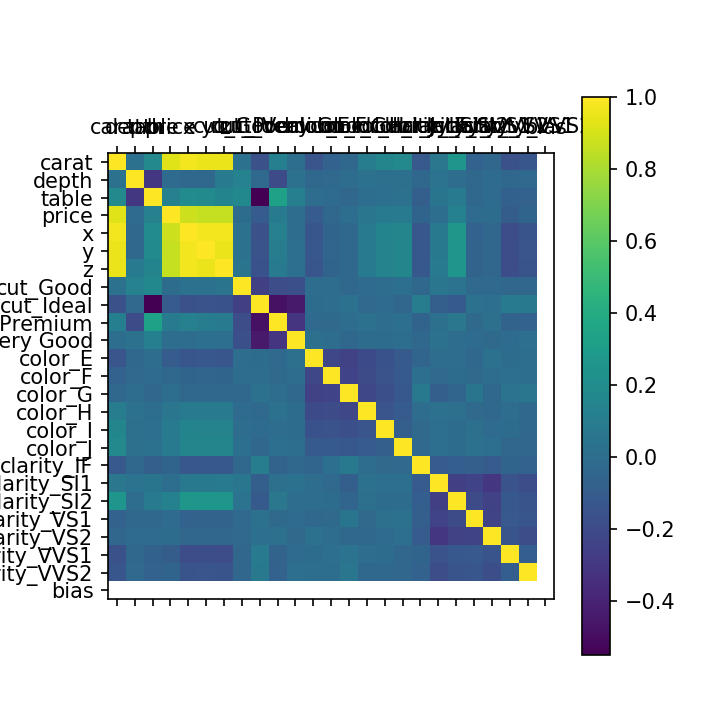

In [19]:
plt.matshow(dataRemoveRedundant.corr())
plt.xticks(range(len(dataRemoveRedundant.columns)), dataRemoveRedundant.columns)
plt.yticks(range(len(dataRemoveRedundant.columns)), dataRemoveRedundant.columns)
plt.colorbar()
plt.show()

In [20]:
corrWithPrice = dataRemoveRedundant.corr()[['price']]
corrWithPrice.abs().sort_values(by=['price'],ascending=False)

,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
clarity_SI2,0.128420
table,0.127134
color_E,0.101089
cut_Ideal,0.097175
color_I,0.097125


 - from above values we select colums ['carat', 'x','y','z'] as the relevant features

In [21]:
df_reducedFeatures = dataRemoveRedundant[['carat', 'x','y','z','bias','price'] ] 
df_reducedFeatures.head()

,carat,x,y,z,bias,price
1,0.23,3.95,3.98,2.43,1,326
2,0.21,3.89,3.84,2.31,1,326
3,0.23,4.05,4.07,2.31,1,327
4,0.29,4.20,4.23,2.63,1,334
5,0.31,4.34,4.35,2.75,1,335


In [22]:
x_rf = df_reducedFeatures.drop('price',axis=1)
y_rf = df_reducedFeatures['price']
colsToNorm = ['carat','x','y','z']
for s in colsToNorm:
    x_rf[s]=(x_rf[s]-x_rf[s].min())/(x_rf[s].max()-x_rf[s].min()) # normalizing the parameters
x_rf_train, x_rf_test_val, y_rf_train, y_rf_test_val = train_test_split(x_rf,y_rf,test_size=0.02,train_size=0.98)
x_rf_val, x_rf_test, y_rf_val, y_rf_test = train_test_split(x_rf_test_val,y_rf_test_val,test_size=0.5,train_size=0.5)
print("original : ",x_rf.shape)
print("training : ",x_rf_train.shape)
print("validation :",x_rf_val.shape)
print("test :",x_rf_test.shape)

original :  (53940, 5)
training :  (52861, 5)
validation : (539, 5)
test : (540, 5)


In [23]:
noOfFeatures_rf = x_rf_train.shape[1]
w_rf = np.zeros(noOfFeatures_rf) # initializing weights with zero
weights_rf = defaultdict(list)
stochasticGradDescent(0.005,w_rf,x_rf_train,y_rf_train,50,weights_rf)

epoch 0 cost :  72105777163.81564
epoch 1 cost :  70801408460.82907
epoch 2 cost :  69689478397.60355
epoch 3 cost :  68712095271.41297
epoch 4 cost :  67852919426.77378
epoch 5 cost :  67097636145.64917
epoch 6 cost :  66433663883.064064
epoch 7 cost :  65849944143.5434
epoch 8 cost :  65336757166.29226
epoch 9 cost :  64885559914.55246
epoch 10 cost :  64488843667.383675
epoch 11 cost :  64140008842.293976
epoch 12 cost :  63833254964.07567
epoch 13 cost :  63563483947.3945
epoch 14 cost :  63326215082.3666
epoch 15 cost :  63117510307.22508
epoch 16 cost :  62933908523.46655
epoch 17 cost :  62772367859.443436
epoch 18 cost :  62630214920.72145
epoch 19 cost :  62505100181.8651
epoch 20 cost :  62394958776.58501
epoch 21 cost :  62297976033.076904
epoch 22 cost :  62212557180.40396
epoch 23 cost :  62137300721.2374
epoch 24 cost :  62070975027.327835
epoch 25 cost :  62012497767.75286
epoch 26 cost :  61960917827.165085
epoch 27 cost :  61915399412.735756
epoch 28 cost :  6187520808

In [28]:
predictedPrices_rf = predict(w_rf,x_rf_test)
df_predictions_rf = pd.DataFrame()
df_predictions_rf['y_linearReg'] = predictedPrices_rf
df_predictions_rf['y_actual'] = list(y_rf_test)
df_predictions_rf.head(10)

,y_linearReg,y_actual
0,4632.561474,4211
1,5217.851778,5572
2,147.497641,620
3,5348.545166,5655
4,358.509177,772
5,14015.428547,9727
6,4677.704210,3696
7,448.711344,705
8,521.441285,689
9,13604.192043,18795


In [34]:
MSE_rf = meanSquaredError(df_predictions_rf['y_linearReg'],df_predictions_rf['y_actual'])
MAE_rf = meanAbsoluteError(df_predictions_rf['y_linearReg'],df_predictions_rf['y_actual'])
r2_rf = r2_score(df_predictions_rf['y_linearReg'],df_predictions_rf['y_actual'])
print("MSE with reduced features : ",MSE_rf)
print("MAE with reduced features : ",MAE_rf)
print("r2 score with reduced features : ",r2_rf)

MSE with reduced features :  2495726.7226562346
MAE with reduced features :  936.8298121546476
r2 score with reduced features :  0.8267143523284097


In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [31]:
reg.predict(x_test)

array([ 8.07085169e+03,  1.51523674e+03,  7.42101164e+02,  1.62383285e+03,
        1.12499744e+03,  1.99623370e+03,  5.66588885e+03,  5.21195852e+02,
        7.27694777e+03,  2.73922157e+03,  7.33028103e+02, -2.28654302e+02,
        1.13363070e+03,  3.51869053e+02,  2.30189396e+01,  9.79066296e+02,
       -3.10289092e+02,  1.35782354e+03,  7.07292649e+03,  1.71032305e+03,
        1.22639214e+04,  2.37390406e+03,  2.15940083e+03,  8.05174631e+03,
        2.69831720e+03,  4.43209114e+03,  1.00768160e+04,  9.29039745e+03,
        5.19411662e+02,  3.22635317e+03,  9.40168958e+03,  7.09106736e+03,
       -8.91577834e+01,  2.26884421e+03,  6.10905884e+02,  2.82219175e+03,
        6.86227310e+03,  7.96637905e+03, -1.21909700e+03,  2.02289630e+02,
        9.95673340e+03, -8.82863551e+01,  3.81810569e+03,  5.53649432e+03,
        4.10953317e+03,  4.79500673e+03,  1.36532475e+03,  8.24035204e+02,
        5.11682441e+03,  1.29934847e+04,  1.33065149e+04,  6.97848867e+03,
       -2.74817677e+02,  

In [32]:
predictedPrices_lib = reg.predict(x_test)
df_predictions_lib = pd.DataFrame()
df_predictions_lib['y_linearReg'] = predictedPrices_lib
df_predictions_lib['y_actual'] = list(y_test)
df_predictions_lib.head(10)

,y_linearReg,y_actual
0,8070.851688,7924
1,1515.236736,1007
2,742.101164,904
3,1623.832847,1345
4,1124.997445,789
5,1996.233700,1207
6,5665.888852,5364
7,521.195852,737
8,7276.947765,7404
9,2739.221574,2184


In [39]:
MSE_lib = meanSquaredError(df_predictions_lib['y_linearReg'],df_predictions_lib['y_actual'])
MAE_lib = meanAbsoluteError(df_predictions_lib['y_linearReg'],df_predictions_lib['y_actual'])
r2_lib = r2_score(df_predictions_lib['y_linearReg'],df_predictions_lib['y_actual'])
print("MSE using lib: ",MSE_lib)
print("MAE using lib : ",MAE_lib)
print("r2 using lib : ",r2_lib)

MSE using lib:  984588.4492914692
MAE using lib :  683.9109217804527
r2 using lib :  0.9301521638481757


In [37]:
reg_rf = LinearRegression().fit(x_rf_train, y_rf_train)
predictedPrices_rf_lib = reg_rf.predict(x_rf_test)
df_predictions_rf_lib = pd.DataFrame()
df_predictions_rf_lib['y_linearReg'] = predictedPrices_rf_lib
df_predictions_rf_lib['y_actual'] = list(y_rf_test)

In [40]:
MSE_rf_lib = meanSquaredError(df_predictions_rf_lib['y_linearReg'],df_predictions_rf_lib['y_actual'])
MAE_rf_lib = meanAbsoluteError(df_predictions_rf_lib['y_linearReg'],df_predictions_rf_lib['y_actual'])
r2_rf_lib = r2_score(df_predictions_rf_lib['y_linearReg'],df_predictions_rf_lib['y_actual'])
print("MSE with reduced features using lib : ",MSE_rf_lib)
print("MAE with reduced features lib : ",MAE_rf_lib)
print("r2 score with library lib : ",r2_rf_lib)

MSE with reduced features using lib :  2473603.0983073865
MAE with reduced features lib :  920.1532035334035
r2 score with library lib :  0.8284974922511291


In [45]:
from prettytable import PrettyTable
tf_lr = PrettyTable(['Error Type', 'All Features','Reduced Features','lib All Features','lib Reduced Features'])
tf_lr.add_row(['MSE', MSE_All_features,MSE_rf,MSE_lib,MSE_rf_lib])
tf_lr.add_row(['MAE', MAE_All_features,MAE_rf,MAE_lib,MAE_rf_lib])
tf_lr.add_row(['r2_score',r2_All_features,r2_rf,r2_lib,r2_rf_lib])
print(tf_lr)

+------------+--------------------+--------------------+--------------------+----------------------+
| Error Type |    All Features    |  Reduced Features  |  lib All Features  | lib Reduced Features |
+------------+--------------------+--------------------+--------------------+----------------------+
|    MSE     | 1003759.4491968064 | 2495726.7226562346 | 984588.4492914692  |  2473603.0983073865  |
|    MAE     | 702.9002949498475  | 936.8298121546476  | 683.9109217804527  |  920.1532035334035   |
|  r2_score  | 0.9277255538339362 | 0.8267143523284097 | 0.9301521638481757 |  0.8284974922511291  |
+------------+--------------------+--------------------+--------------------+----------------------+


 - Adding the extra features made the model better as we can see with all features we are getting less error compared to few features
 - Comparing KNN and linear regression first let us look at error values below

In [75]:
tf_Comp = PrettyTable(['Error Type', 'Linear Regression ','KNN Regression'])
tf_Comp.add_row(['MSE', MSE_All_features,MSE_final])
tf_Comp.add_row(['MAE', MAE_All_features,MAE_final])
tf_Comp.add_row(['r2_score',r2_All_features,r2_score_final])
print(tf_Comp)

+------------+--------------------+--------------------+
| Error Type | Linear Regression  |   KNN Regression   |
+------------+--------------------+--------------------+
|    MSE     | 1003759.4491968064 | 482940.36481481517 |
|    MAE     | 702.9002949498475  | 340.9290123456787  |
|  r2_score  | 0.9277255538339362 | 0.9699614050921816 |
+------------+--------------------+--------------------+


 - From the above error values we can say that KNN Regression is better than linear regression
 - Once the weights the weights are determined. Predicting output is much faster in Linear Regression where as in KNN we have to compute distance with all the training data for each prediction.
 - Hence Linear regression is fast , but KNN is more accurate